#    FIFA World Cup 2018 Insights from statsbomb free data

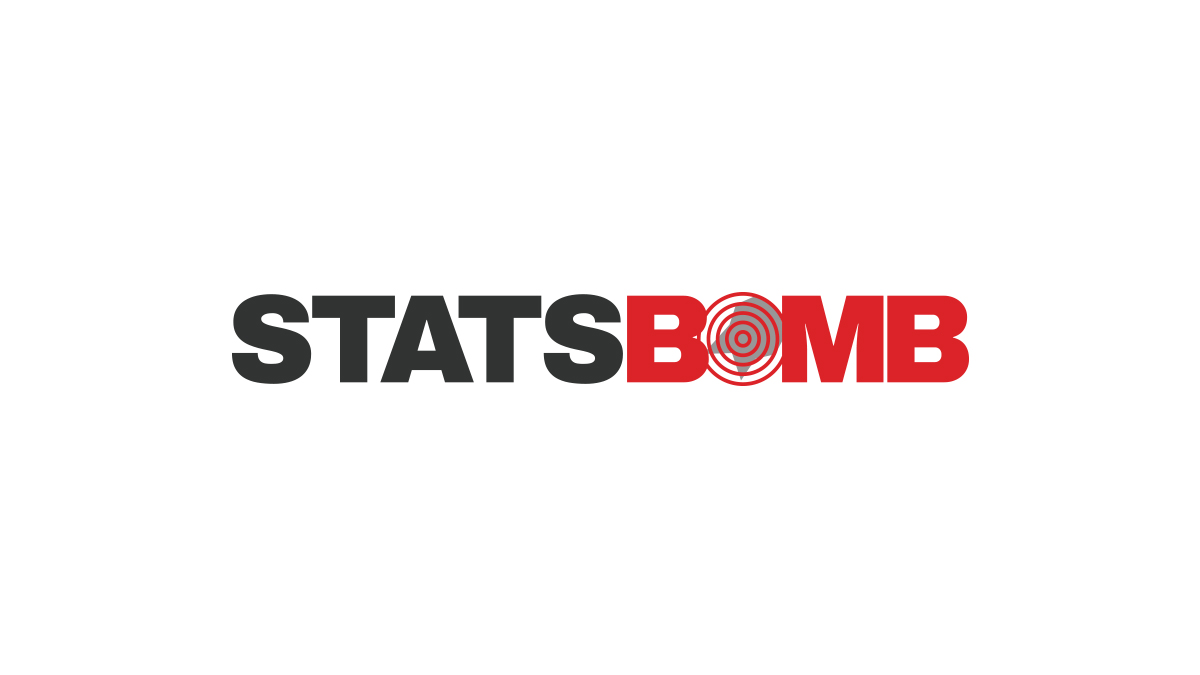

In [1]:
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Omar\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Omar\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Omar\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


**Load competitions json file**

In [2]:
competitions = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json')
competitions = competitions.json()

**View different competitions**

In [4]:
for competition in competitions:
    print(competition['competition_name'],competition['season_name'],competition['competition_id'],competition['season_id'])

Champions League 2018/2019 16 4
Champions League 2017/2018 16 1
Champions League 2016/2017 16 2
Champions League 2015/2016 16 27
Champions League 2014/2015 16 26
Champions League 2013/2014 16 25
Champions League 2012/2013 16 24
Champions League 2011/2012 16 23
Champions League 2010/2011 16 22
Champions League 2009/2010 16 21
Champions League 2008/2009 16 41
Champions League 2006/2007 16 39
Champions League 2004/2005 16 37
Champions League 2003/2004 16 44
Champions League 1999/2000 16 76
FA Women's Super League 2019/2020 37 42
FA Women's Super League 2018/2019 37 4
FIFA World Cup 2018 43 3
La Liga 2019/2020 11 42
La Liga 2018/2019 11 4
La Liga 2017/2018 11 1
La Liga 2016/2017 11 2
La Liga 2015/2016 11 27
La Liga 2014/2015 11 26
La Liga 2013/2014 11 25
La Liga 2012/2013 11 24
La Liga 2011/2012 11 23
La Liga 2010/2011 11 22
La Liga 2009/2010 11 21
La Liga 2008/2009 11 41
La Liga 2007/2008 11 40
La Liga 2006/2007 11 39
La Liga 2005/2006 11 38
La Liga 2004/2005 11 37
NWSL 2018 49 3
Premier 

# Load FIFA World Cup 2018 Data

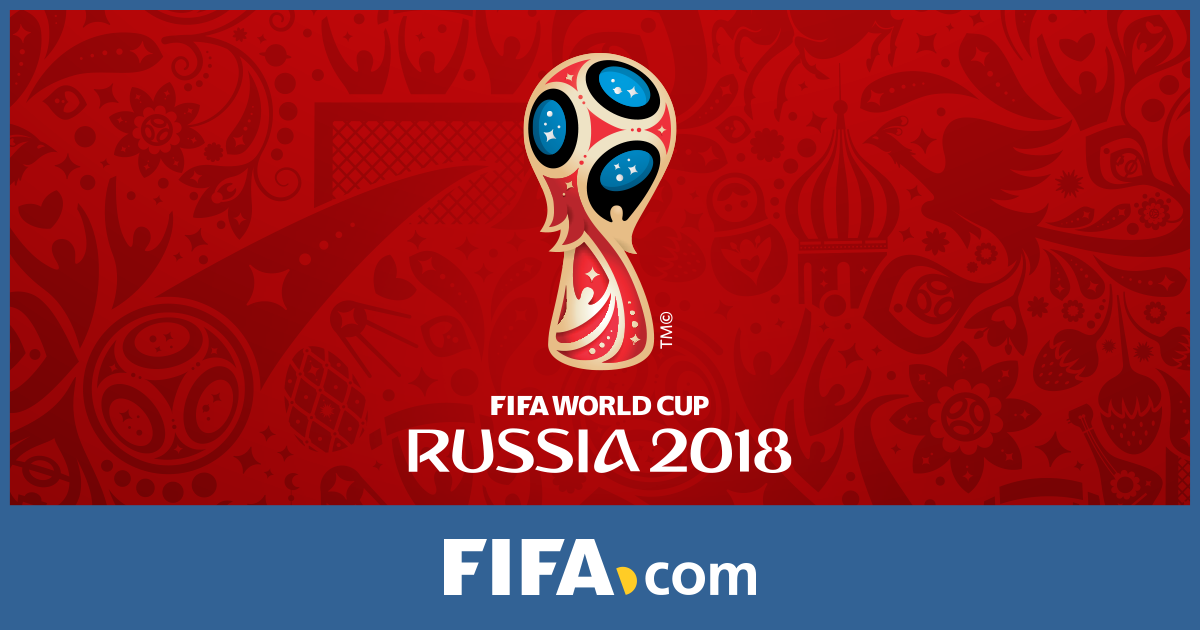

In [5]:
competition_id = 43
season_id = 3

In [6]:
matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/'+str(competition_id)+'/'+str(season_id)+'.json')
matches = matches.json()

In [8]:
matches_df = json_normalize(matches, sep = "_")

In [9]:
matches_df.head()

match_id  match_date      kick_off  home_score  away_score match_status  \
0      7581  2018-07-01  20:00:00.000           1           1    available   
1      7549  2018-06-22  17:00:00.000           2           0    available   
2      7555  2018-06-24  20:00:00.000           0           3    available   
3      7529  2018-06-16  21:00:00.000           2           0    available   
4      7548  2018-06-22  14:00:00.000           2           0    available   

  match_status_360      last_updated last_updated_360  match_week  ...  \
0      unscheduled  2020-07-29T05:00             None           4  ...   
1      unscheduled  2020-07-29T05:00             None           2  ...   
2      unscheduled  2020-07-29T05:00             None           2  ...   
3      unscheduled  2020-07-29T05:00             None           1  ...   
4      unscheduled  2020-07-29T05:00             None           2  ...   

   competition_stage_id competition_stage_name stadium_id  \
0                    33            Round of 16     4263.0   
1                    10            Group Stage     4257.0   
2                    10            Group Stage     4258.0   
3                    10            Group Stage     4260.0   
4                    10            Group Stage     4726.0   

               stadium_name stadium_country_id  stadium_country_name  \
0   Stadion Nizhny Novgorod              188.0                Russia   
1           Volgograd Arena              188.0                Russia   
2     Kazan' Arena (Kazan')              188.0                Russia   
3       Stadion Kaliningrad              255.0         International   
4  Saint-Petersburg Stadium              255.0         International   

  referee_id  referee_name referee_country_id  referee_country_name  
0      730.0     N. Pitana                NaN                   NaN  
1      739.0     M. Conger                NaN                   NaN  
2      740.0      C. Ramos              147.0                Mexico  
3      738.0  Sandro Ricci                NaN                   NaN  
4      287.0    B. Kuipers              160.0           Netherlands  

[5 rows x 40 columns]

**Combine all events in one dataframe**

In [10]:
all_events = pd.DataFrame()
for i in matches_df['match_id']:
    events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/'+str(i)+'.json')
    events = events.json()
    events = json_normalize(events, sep = "_")
    all_events = all_events.append(events)

**Label all completed passes with 'complete' **

In [11]:
all_events['pass_outcome_name'] = all_events['pass_outcome_name'].apply(lambda x: 'complete' if(pd.isnull(x)) else x)

In [12]:
pd.set_option("display.max.columns",None)

**View the dataframe of all events and its shape**

In [13]:
print(all_events.shape)
all_events.head()

(227886, 121)


id  index  period     timestamp  minute  \
0  0aa135b8-37b4-4482-adc7-f02e85a19bec      1       1  00:00:00.000       0   
1  086b7750-936b-4ffd-9a00-bfd72c7a0f26      2       1  00:00:00.000       0   
2  53f0c3f9-129e-47b5-ba77-ae9d214df56f      3       1  00:00:00.000       0   
3  49233ae2-594f-43c9-a58c-a6a0b8f99ee2      4       1  00:00:00.000       0   
4  ec5ba260-9bd3-4c5a-b7a5-9f9168ea905d      5       1  00:00:01.013       0   

   second  possession  duration  type_id    type_name  possession_team_id  \
0       0           1     0.000       35  Starting XI                 785   
1       0           1     0.000       35  Starting XI                 785   
2       0           1     0.000       18   Half Start                 785   
3       0           1     9.813       18   Half Start                 785   
4       1           2     1.640       30         Pass                 776   

  possession_team_name  play_pattern_id play_pattern_name  team_id team_name  \
0              Croatia                1      Regular Play      785   Croatia   
1              Croatia                1      Regular Play      776   Denmark   
2              Croatia                1      Regular Play      785   Croatia   
3              Croatia                1      Regular Play      776   Denmark   
4              Denmark                9     From Kick Off      776   Denmark   

   tactics_formation                                     tactics_lineup  \
0             4141.0  [{'player': {'id': 3444, 'name': 'Danijel Suba...   
1             4411.0  [{'player': {'id': 3815, 'name': 'Kasper Schme...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   

                           related_events      location  player_id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [49233ae2-594f-43c9-a58c-a6a0b8f99ee2]           NaN        NaN   
3  [53f0c3f9-129e-47b5-ba77-ae9d214df56f]           NaN        NaN   
4  [797a8169-c17f-4dbe-aa71-406cf0cf1bd6]  [61.0, 41.0]     3043.0   

                   player_name  position_id      position_name  \
0                          NaN          NaN                NaN   
1                          NaN          NaN                NaN   
2                          NaN          NaN                NaN   
3                          NaN          NaN                NaN   
4  Christian Dannemann Eriksen         25.0  Secondary Striker   

   pass_recipient_id            pass_recipient_name  pass_length  pass_angle  \
0                NaN                            NaN          NaN         NaN   
1                NaN                            NaN          NaN         NaN   
2                NaN                            NaN          NaN         NaN   
3                NaN                            NaN          NaN         NaN   
4             3027.0  Mathias Jattah-Njie Jørgensen     24.33105   -2.976444   

   pass_height_id pass_height_name pass_end_location  pass_body_part_id  \
0             NaN              NaN               NaN                NaN   
1             NaN              NaN               NaN                NaN   
2             NaN              NaN               NaN                NaN   
3             NaN              NaN               NaN                NaN   
4             1.0      Ground Pass      [37.0, 37.0]               40.0   

  pass_body_part_name  pass_type_id pass_type_name under_pressure  \
0                 NaN           NaN            NaN            NaN   
1                 NaN           NaN            NaN            NaN   
2                 NaN           NaN            NaN            NaN   
3                 NaN           NaN            NaN            NaN   
4          Right Foot          65.0       Kick Off            NaN 

# Passes under pressure

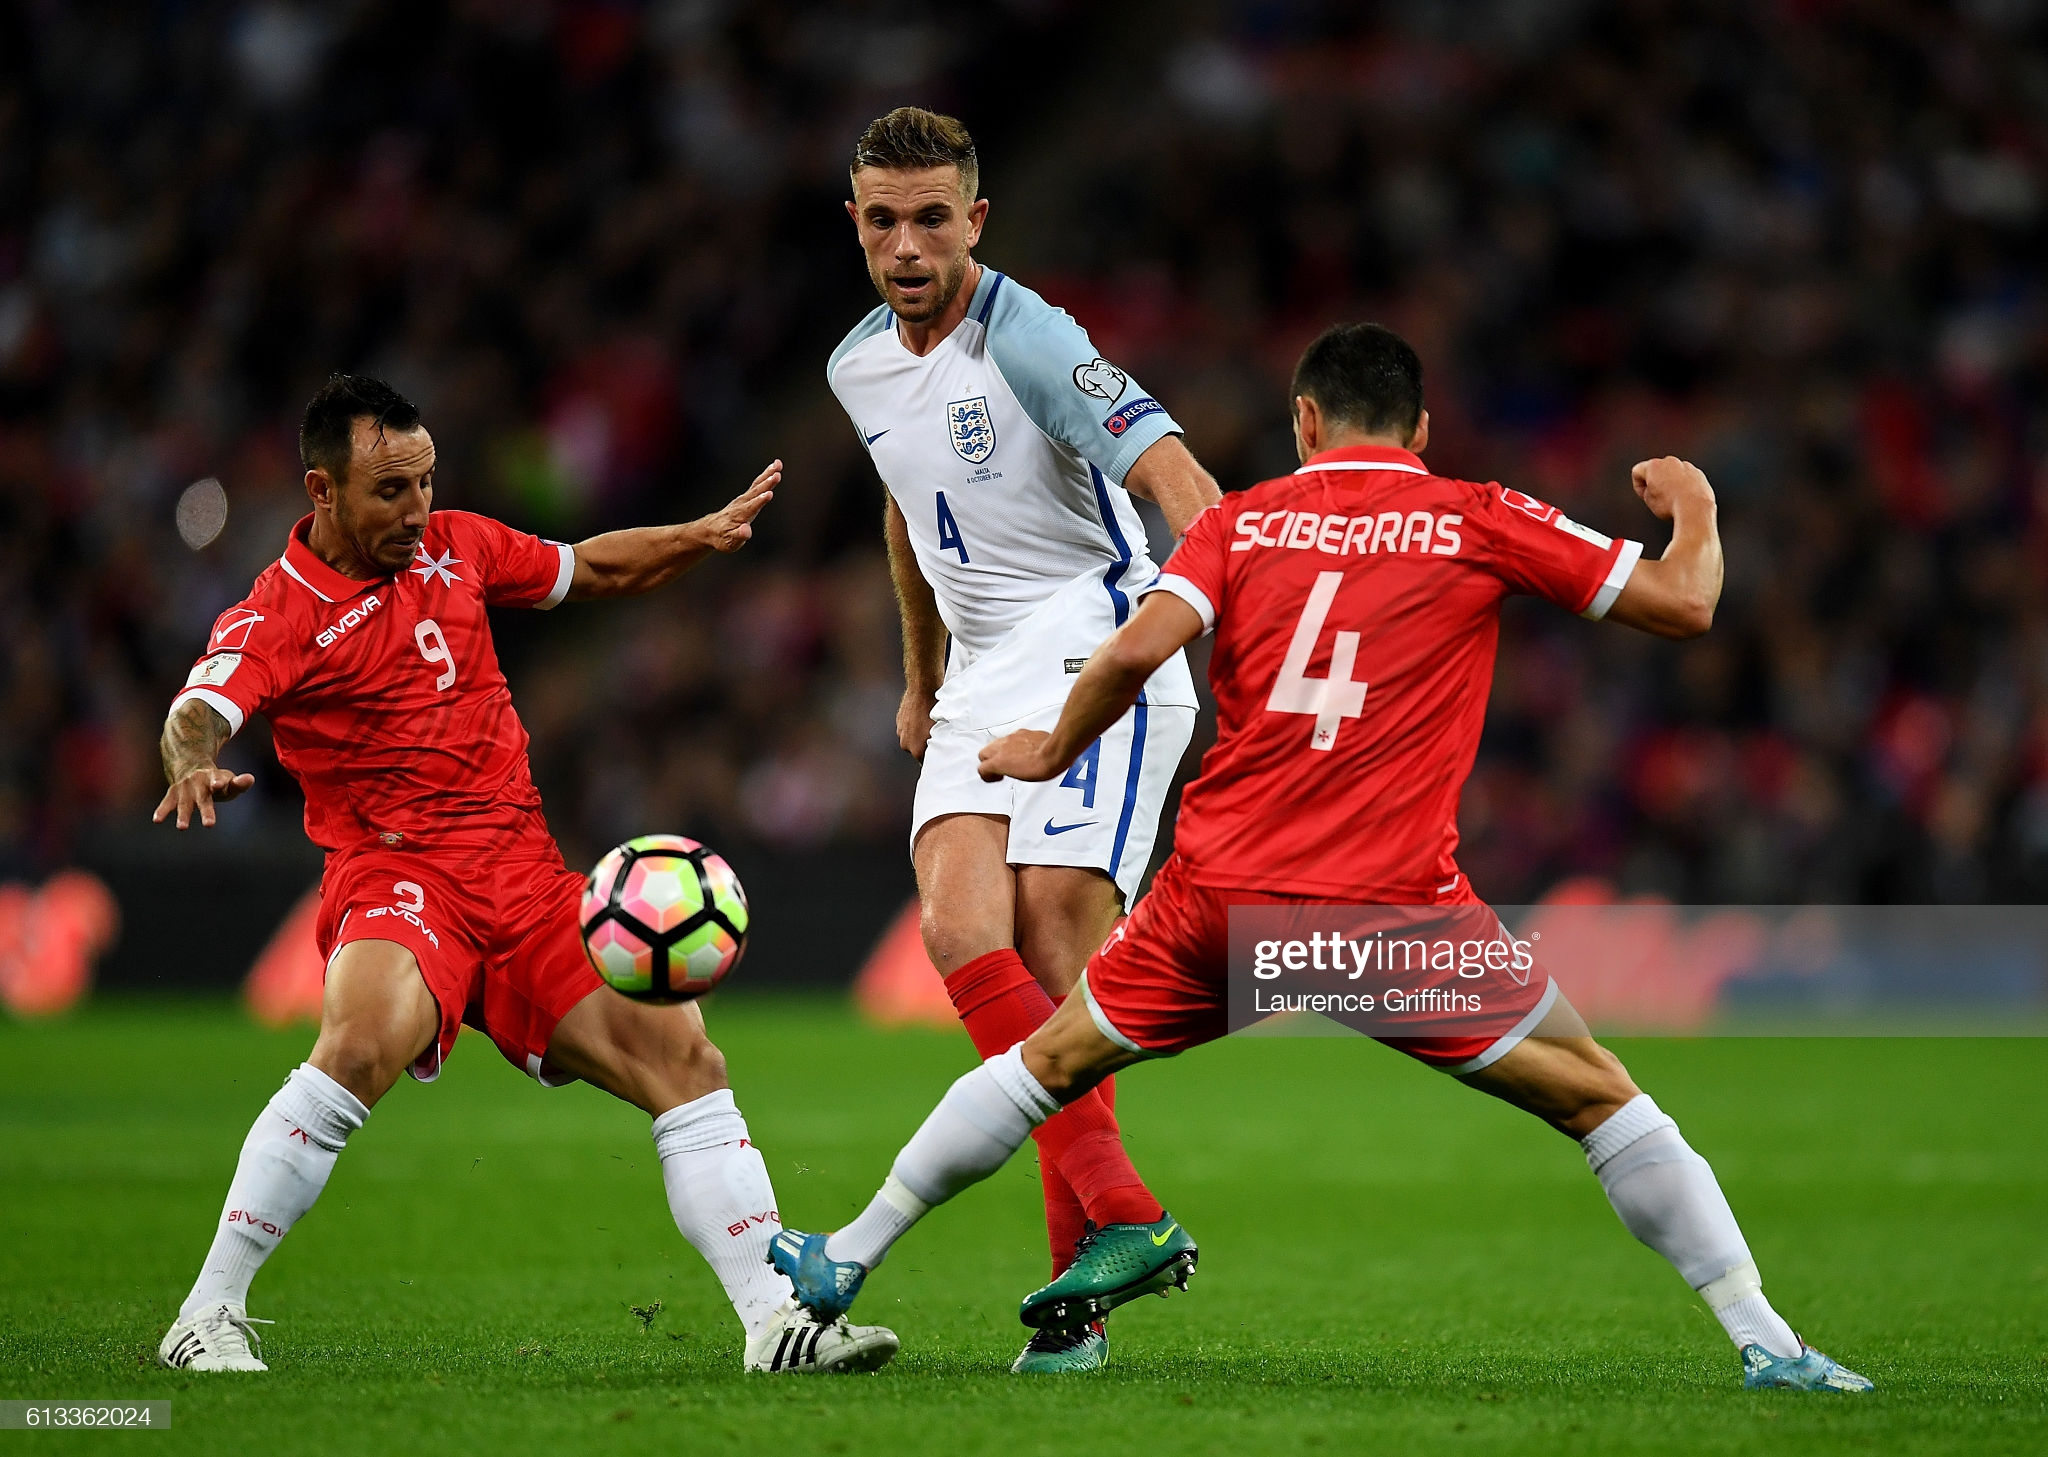

In [15]:
passes_under_pressure = all_events[(all_events['type_name'] == 'Pass') & (all_events['under_pressure'] == True) & (all_events['pass_outcome_name'] == 'complete')]

# Positions to complete passes more under pressure

In [16]:
passes_under_pressure['position_name'].value_counts()

Left Center Midfield         1019
Left Back                     906
Right Center Midfield         880
Right Back                    867
Right Center Back             708
Left Center Back              707
Right Wing                    643
Left Wing                     614
Left Midfield                 446
Center Defensive Midfield     429
Center Forward                411
Center Attacking Midfield     410
Right Midfield                368
Right Defensive Midfield      288
Left Defensive Midfield       273
Right Center Forward          209
Left Center Forward           186
Center Back                   134
Goalkeeper                    109
Right Wing Back                85
Center Midfield                82
Right Attacking Midfield       77
Left Wing Back                 69
Left Attacking Midfield        66
Secondary Striker              50
Name: position_name, dtype: int64

# So "Left Center Midfield" position is the most to complete passes under pressure

# Let's see top players completing passes under pressure

In [18]:
passes_under_pressure['player_name'].value_counts()[0:20]

Francisco Román Alarcón Suárez    136
Jordi Alba Ramos                  101
Luka Modrić                        93
Granit Xhaka                       90
Andrés Iniesta Luján               80
Sergio Busquets i Burgos           80
Axel Witsel                        74
Kieran Trippier                    72
John Stones                        72
David Josué Jiménez Silva          72
Marcelo Brozović                   71
Ivan Rakitić                       69
Šime Vrsaljko                      67
Kevin De Bruyne                    66
Jan Vertonghen                     64
Harry Maguire                      64
Toni Kroos                         63
Eden Hazard                        63
Jordan Brian Henderson             61
Jesse Lingard                      61
Name: player_name, dtype: int64

# So Isco is the top player to complete passes under pressure

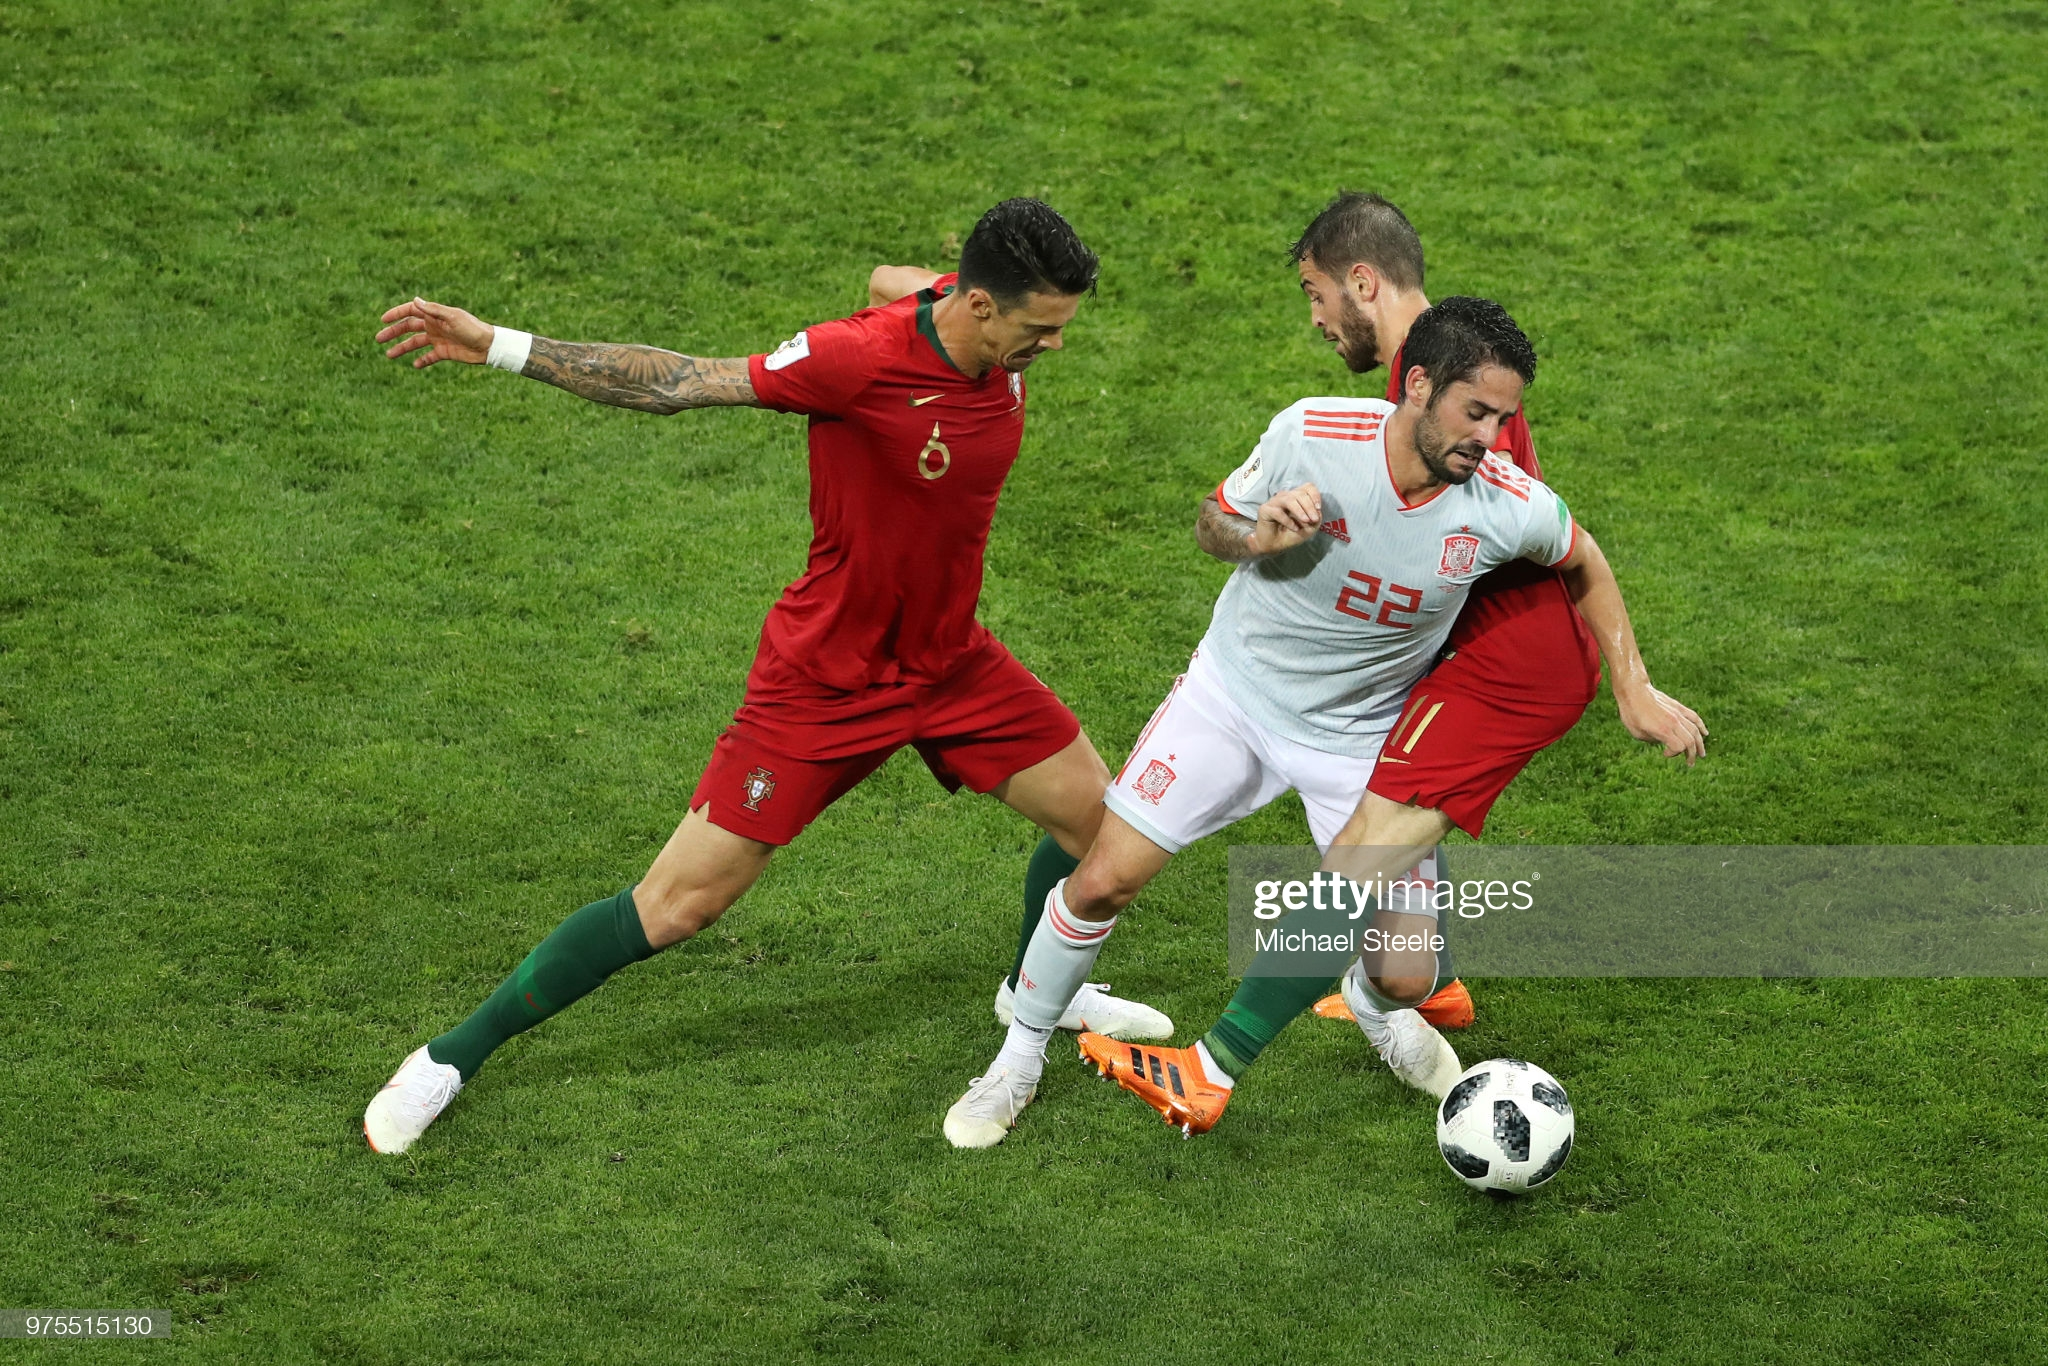

# Top Midfield Passers with weak foot

In [20]:
right_foot = all_events[(all_events['type_id'] == 30) & (all_events['position_name'].str.contains('Midfield'))].groupby(['player_name'], as_index=True)[['pass_body_part_name']].apply(lambda x: x[x == 'Right Foot'].count())
right_foot_acc = all_events[(all_events['type_id'] == 30) & (all_events['position_name'].str.contains('Midfield')) & (all_events['pass_body_part_name'] == 'Right Foot')].groupby(['player_name'], as_index=True)[['pass_outcome_name']].apply(lambda x: x[x == 'complete'].count())
right_foot_acc['acc'] = round((right_foot_acc['pass_outcome_name']) / (right_foot['pass_body_part_name']),2)
left_foot = all_events[(all_events['type_id'] == 30) & (all_events['position_name'].str.contains('Midfield'))].groupby(['player_name'], as_index=True)[['pass_body_part_name']].apply(lambda x: x[x == 'Left Foot'].count())
left_foot_acc = all_events[(all_events['type_id'] == 30) & (all_events['position_name'].str.contains('Midfield')) & (all_events['pass_body_part_name'] == 'Left Foot')].groupby(['player_name'], as_index=True)[['pass_outcome_name']].apply(lambda x: x[x == 'complete'].count())
left_foot_acc['acc'] = round((left_foot_acc['pass_outcome_name']) / (left_foot['pass_body_part_name']),2)
right_foot['left footed passes'] = left_foot['pass_body_part_name']

passes = right_foot.copy()
passes['left_acc'] = left_foot_acc['acc']
passes['right_acc'] = right_foot_acc['acc']
passes['difference'] = np.abs(passes['pass_body_part_name'] - passes['left footed passes'])
passes['weak_foot'] = [int(x.loc['left footed passes']) if x.loc['left footed passes'] < x.loc['pass_body_part_name'] else int(x.loc['pass_body_part_name']) for y, x in passes.iterrows()]
passes['preferred_foot'] = [int(x.loc['left footed passes']) if x.loc['left footed passes'] > x.loc['pass_body_part_name'] else int(x.loc['pass_body_part_name']) for y, x in passes.iterrows()]
passes['left_acc'] = passes['left_acc'].apply(lambda x: 0.0 if(pd.isnull(x)) else x)
passes['right_acc'] = passes['right_acc'].apply(lambda x: 0.0 if(pd.isnull(x)) else x)
passes['weak_accuracy'] = [x.loc['left_acc'] if x.loc['left_acc'] < x.loc['right_acc'] else x.loc['right_acc'] for y, x in passes.iterrows()]
passes['preferred_accuracy'] = [x.loc['left_acc'] if x.loc['left_acc'] > x.loc['right_acc'] else x.loc['right_acc'] for y, x in passes.iterrows()]
passes_stats = passes.drop(['pass_body_part_name','left footed passes','left_acc','right_acc'], axis=1)
passes_stats[(passes_stats['weak_foot']>120) | (passes_stats['preferred_foot']>120)].sort_values(by='weak_accuracy',ascending=False).head(15)

difference  weak_foot  preferred_foot  \
player_name                                                                
Sergio Busquets i Burgos                  192         51             243   
Axel Witsel                               280         14             294   
Jorge Resurrección Merodio                191         36             227   
Adrien Sebastian Perruchet Silva          110         21             131   
Makoto Hasebe                             122         40             162   
Granit Xhaka                              238         47             285   
Mile Jedinak                              131         10             141   
João Mário Naval da Costa Eduardo         119         17             136   
Abdullah Ibrahim Otayf                    182         34             216   
Philippe Coutinho Correia                 260         15             275   
José Paulo Bezzera Maciel Júnior          133          9             142   
Rodrigo Bentancur Colmán                  148         35             183   
Mesut Özil                                145         13             158   
Jesse Lingard                             188         14             202   
Héctor Miguel Herrera López               126         36             162   

                                   weak_accuracy  preferred_accuracy  
player_name                                                           
Sergio Busquets i Burgos                    0.93                0.96  
Axel Witsel                                 0.93                0.96  
Jorge Resurrección Merodio                  0.91                1.00  
Adrien Sebastian Perruchet Silva            0.90                0.92  
Makoto Hasebe                               0.90                0.90  
Granit Xhaka                                0.89                0.94  
Mile Jedinak                                0.89                0.90  
João Mário Naval da Costa Eduardo           0.88                0.94  
Abdullah Ibrahim Otayf                      0.88                0.91  
Philippe Coutinho Correia                   0.87                0.90  
José Paulo Bezzera Maciel Júnior            0.87                1.00  
Rodrigo Bentancur Colmán                    0.86                0.89  
Mesut Özil                                  0.86                1.00  
Jesse Lingard                               0.86                0.93  
Héctor Miguel Herrera López                 0.86                0.89

# So Sergio Busquets has the most accuracy with passing with weak foot

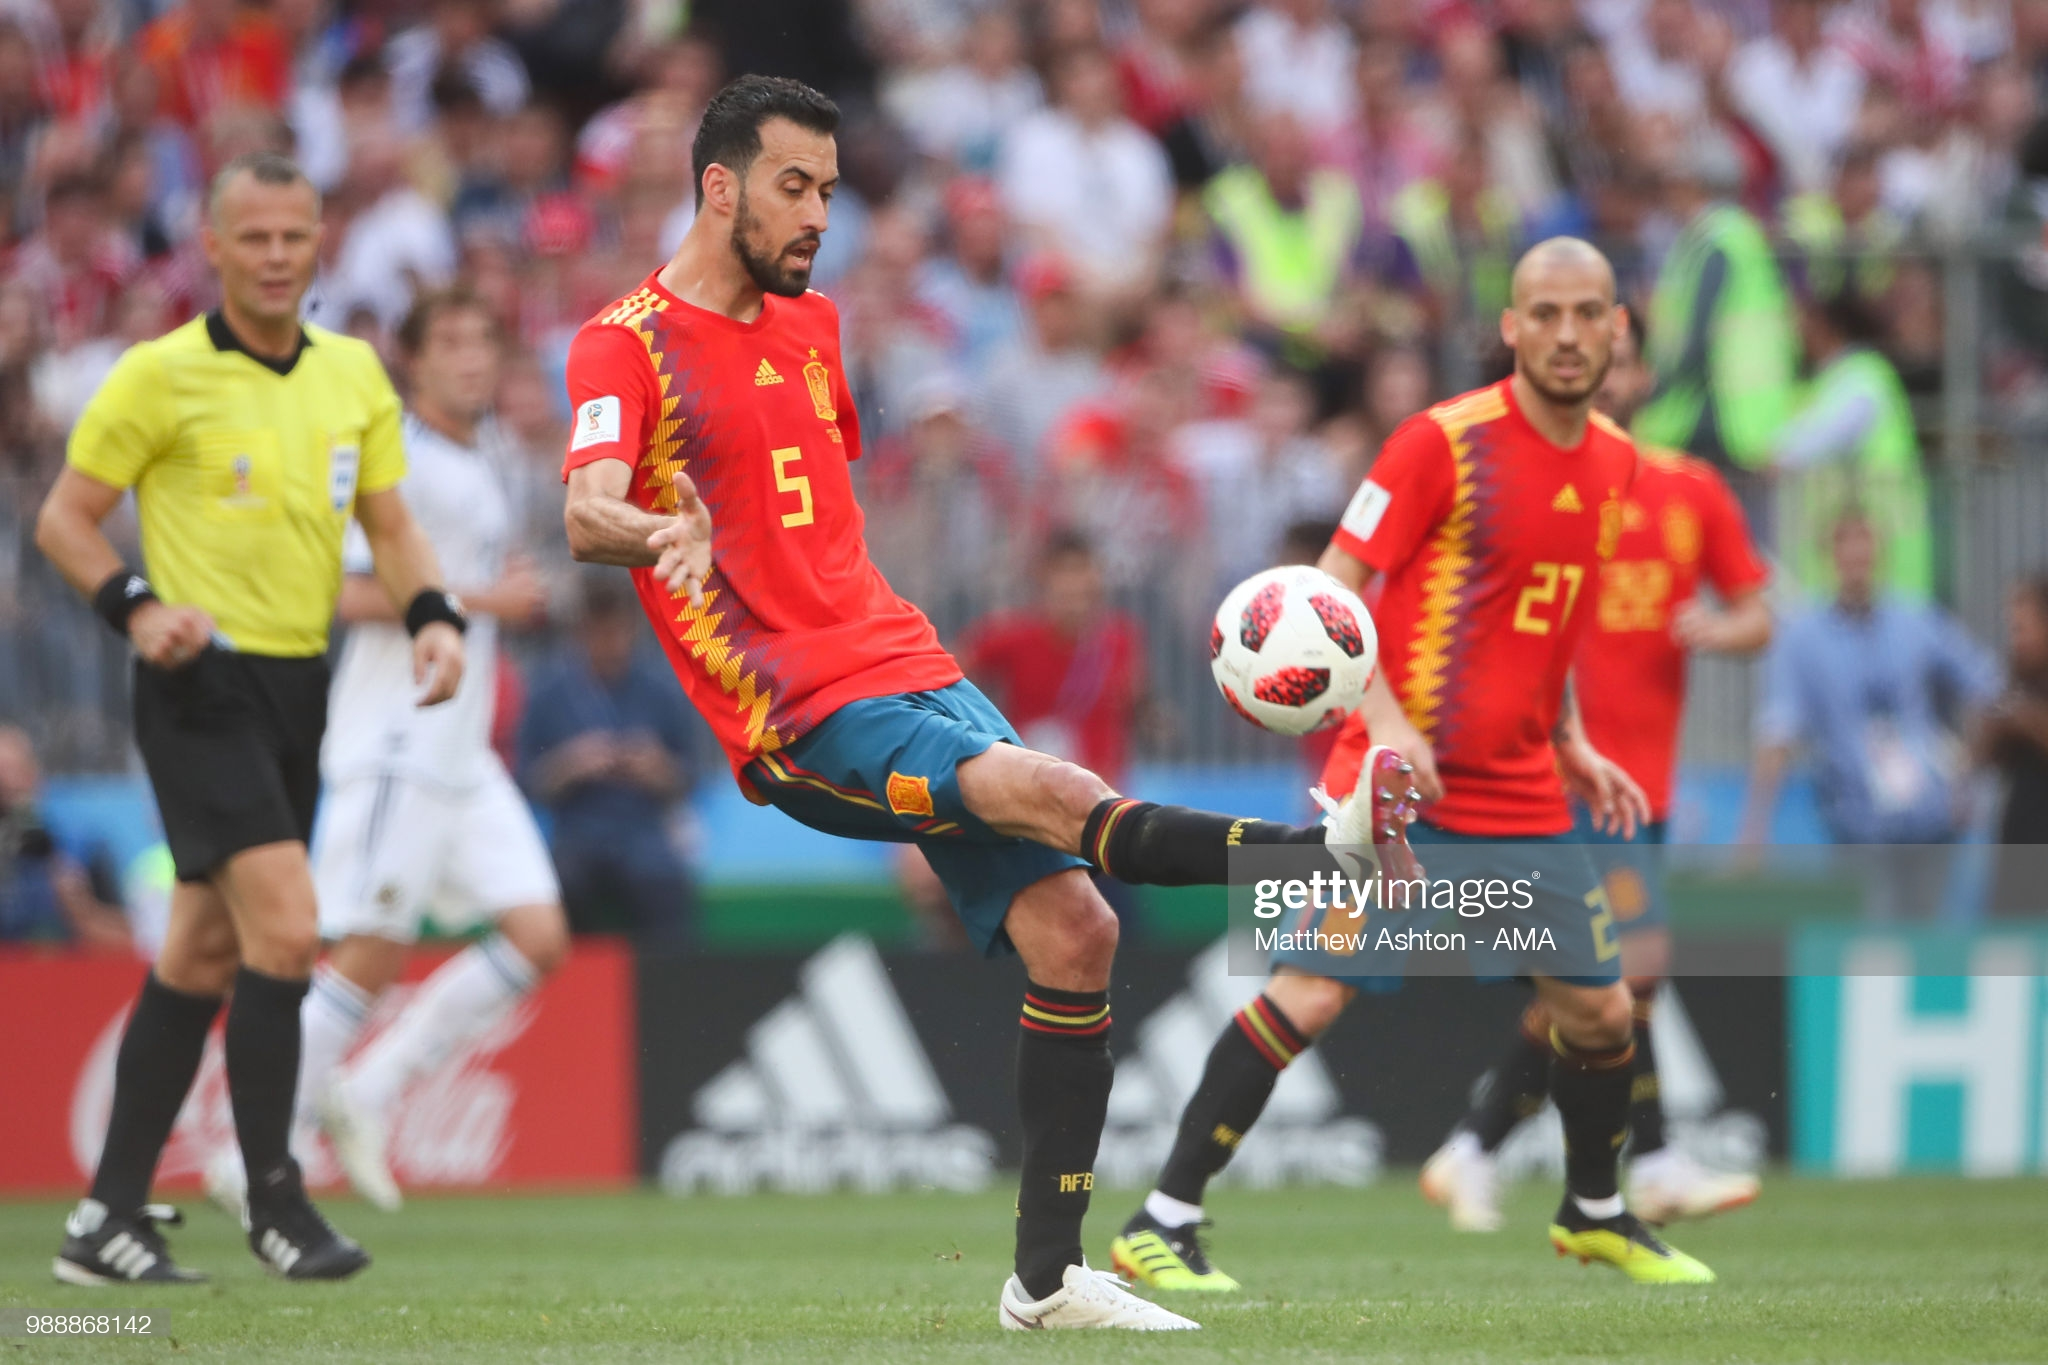

# Let's see top players have flexiblity to use the two feet for passing

**For only players have more than 120 passes with preferred foot**

In [22]:
passes_stats[(passes_stats['weak_foot']>120) | (passes_stats['preferred_foot']>120)].sort_values(by='difference',ascending=True).head(15)

difference  weak_foot  preferred_foot  \
player_name                                                                
Aaron Mooy                                 99         49             148   
Oghenekaro Etebo                          104         21             125   
Albin Ekdal                               106         24             130   
Thomas Delaney                            108         27             135   
Ashley Young                              109         31             140   
Adrien Sebastian Perruchet Silva          110         21             131   
Bamidele Alli                             112         16             128   
Antoine Griezmann                         113         21             134   
Roman Zobnin                              114         33             147   
Sebastian Larsson                         116         18             134   
Grzegorz Krychowiak                       117         27             144   
Ferjani Sassi                             117         16             133   
Juan Fernando Quintero Paniagua           119          7             126   
João Mário Naval da Costa Eduardo         119         17             136   
John Michael Nchekwube Obinna             120         11             131   

                                   weak_accuracy  preferred_accuracy  
player_name                                                           
Aaron Mooy                                  0.80                0.85  
Oghenekaro Etebo                            0.76                0.84  
Albin Ekdal                                 0.83                0.83  
Thomas Delaney                              0.85                0.85  
Ashley Young                                0.74                0.84  
Adrien Sebastian Perruchet Silva            0.90                0.92  
Bamidele Alli                               0.76                0.88  
Antoine Griezmann                           0.69                0.90  
Roman Zobnin                                0.55                0.77  
Sebastian Larsson                           0.72                0.77  
Grzegorz Krychowiak                         0.81                1.00  
Ferjani Sassi                               0.82                0.94  
Juan Fernando Quintero Paniagua             0.71                0.71  
João Mário Naval da Costa Eduardo           0.88                0.94  
John Michael Nchekwube Obinna               0.82                0.84

# so Aaron Mooy	is more flexible than any other midfield player to pass with his two feet

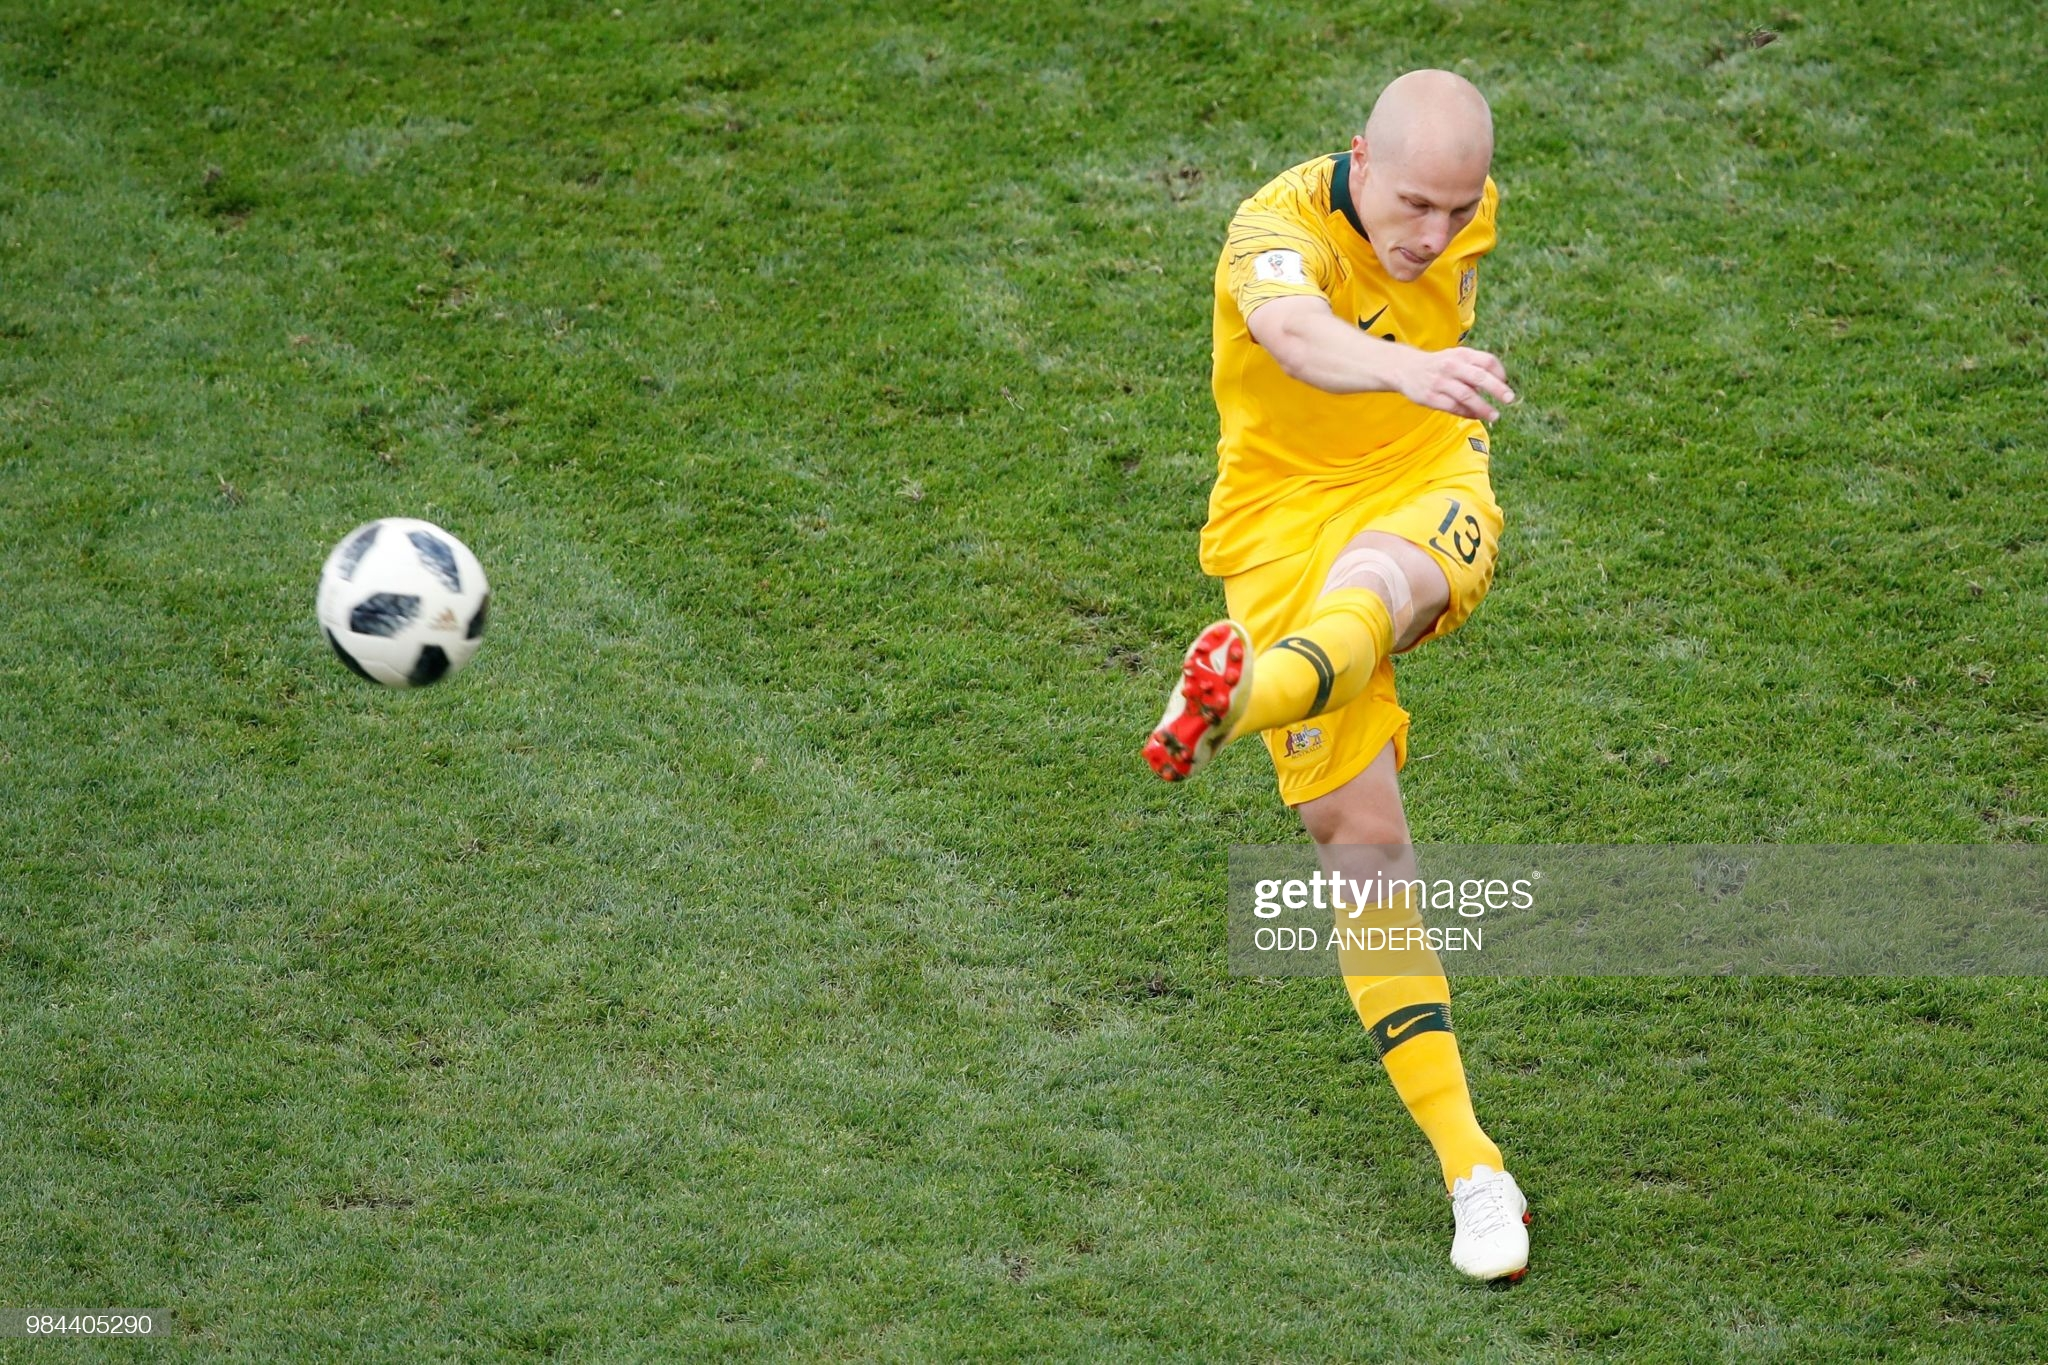

# Let's see top players to complete ground crosses

In [24]:
ground_crossers = all_events[(all_events['pass_cross']==True)&(all_events['pass_height_name']=='Ground Pass')&(all_events['pass_outcome_name']=='complete')].groupby(['player_name'], as_index=True)[['player_name']].count()
ground_crossers['crosses'] = ground_crossers['player_name']
ground_crossers = ground_crossers.drop(['player_name'],axis=1)
ground_crossers.sort_values(by='crosses',ascending=False).head(15)

crosses
player_name                              
Neymar da Silva Santos Junior           4
Timo Werner                             3
Jordi Alba Ramos                        3
David Josué Jiménez Silva               2
Ruben Loftus-Cheek                      2
Fágner Conserva Lemos                   2
Eduardo Antonio Salvio                  2
Joshua Kimmich                          2
Douglas Costa de Souza                  2
Šime Vrsaljko                           2
José Paulo Bezzera Maciel Júnior        2
Kylian Mbappé Lottin                    2
Andrés Iniesta Luján                    2
Rodrigo Bentancur Colmán                1
Philippe Coutinho Correia               1

# So Neymar has most completed ground crosses

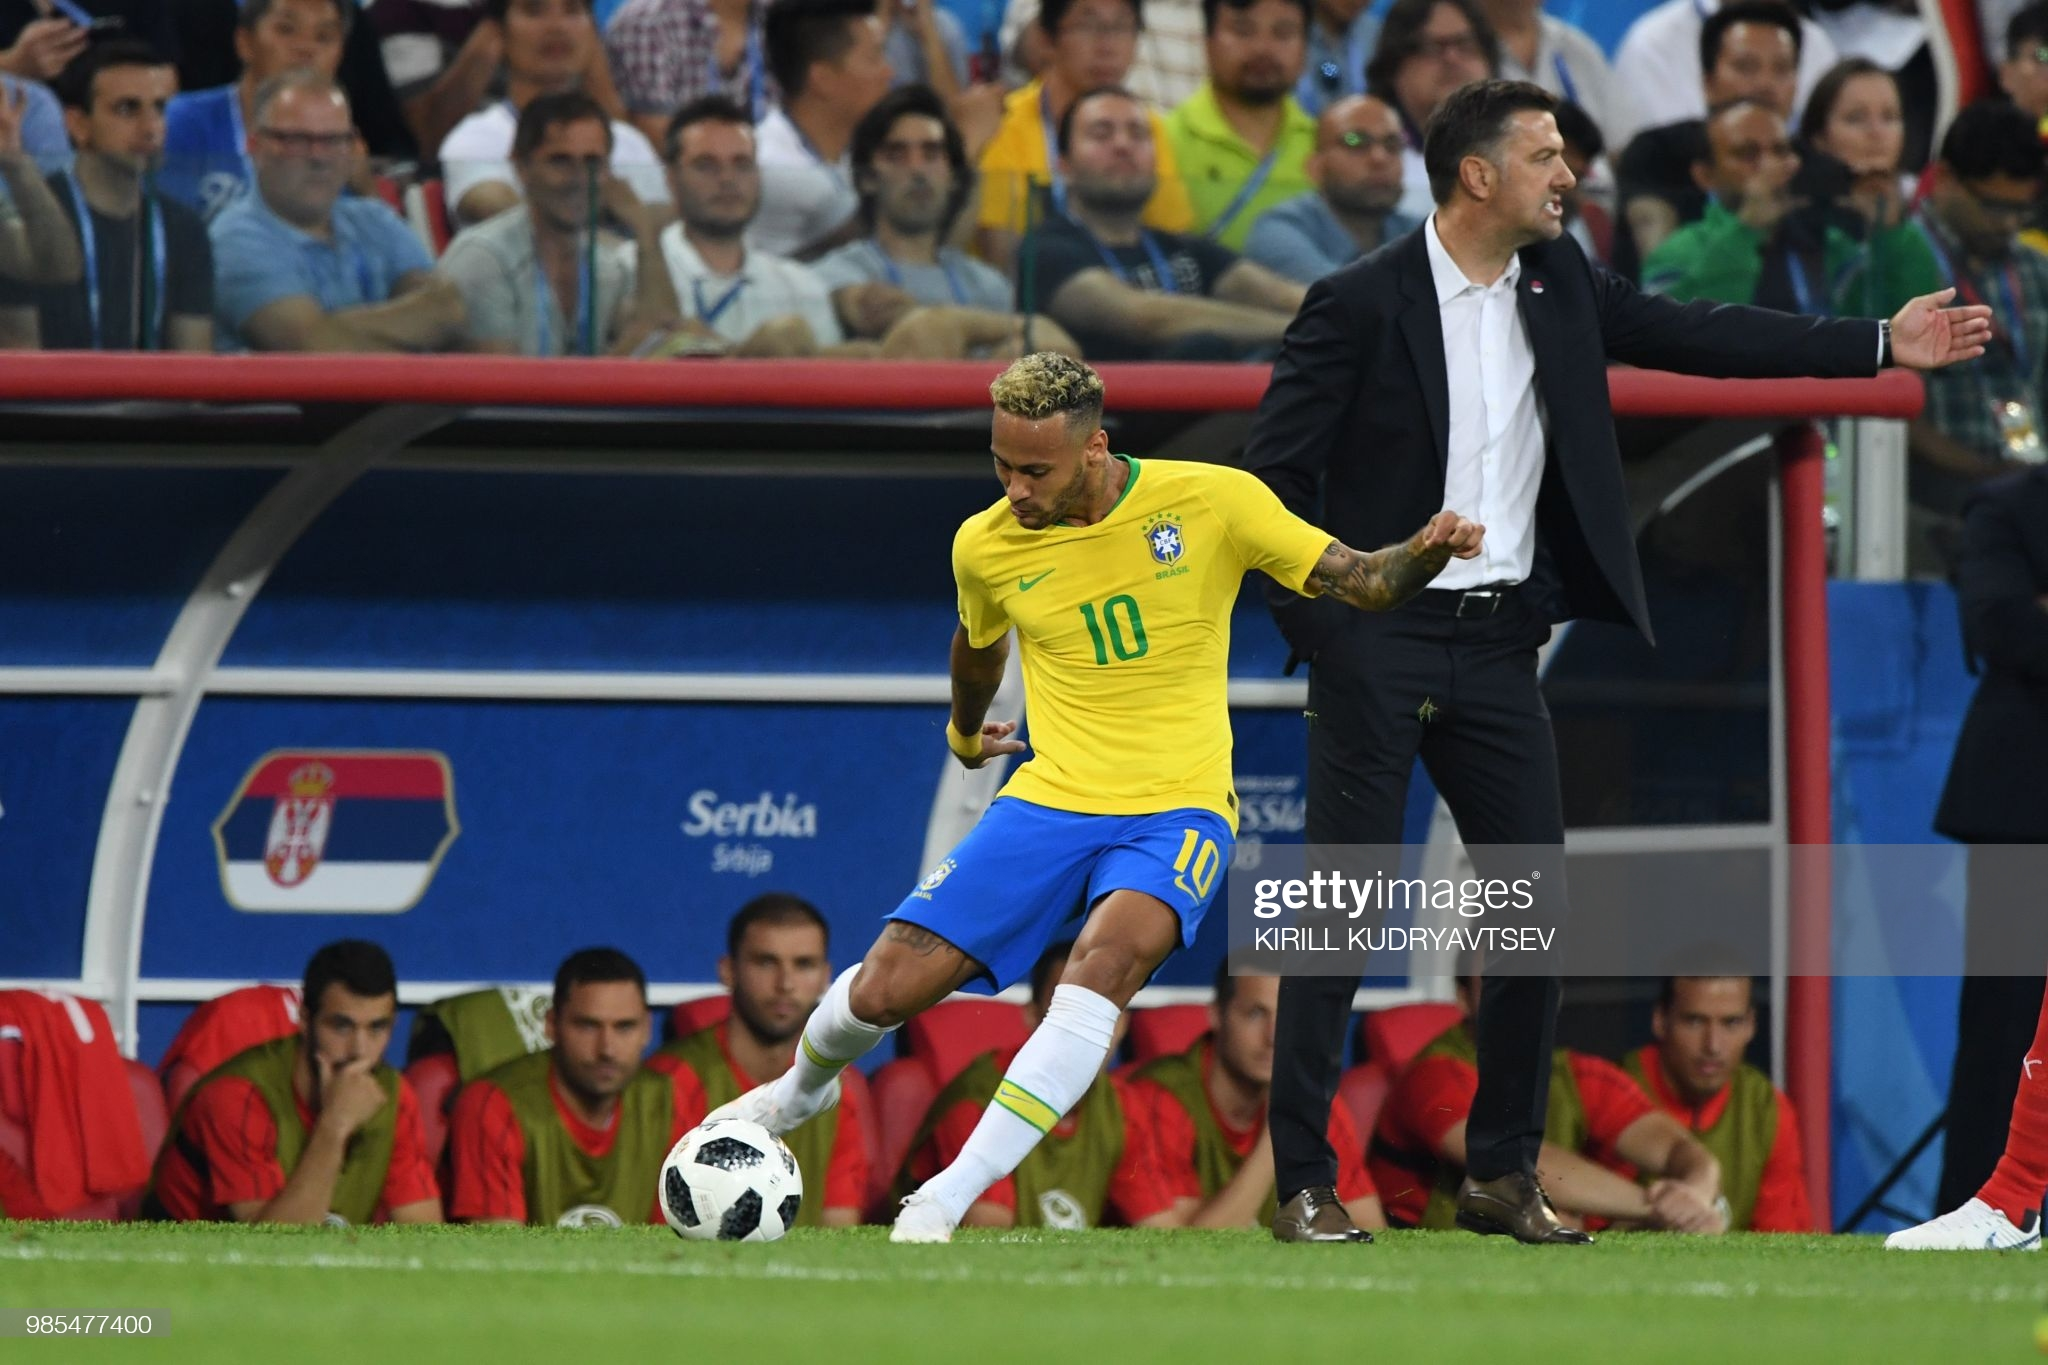

# To Continue ...